<a href="https://colab.research.google.com/github/Sercan1111/Emotion-Analysis-NLP/blob/main/EmotionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import emoji
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
file_path = "/content/drive/MyDrive/Colab_Notebooks/Emotion_classify_Data.csv"
df = pd.read_csv(file_path)
preview = df.head(20)
preview

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
5,i feel jealous becasue i wanted that kind of l...,anger
6,when a friend of mine keeps telling me morbid ...,anger
7,i finally fell asleep feeling angry useless an...,anger
8,i feel a bit annoyed and antsy in a good way,anger
9,i feel like i ve regained another vital part o...,joy


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 3.2 MB/s eta 0:00:00


<ipython-input-3-db3e055af2d9>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=top_words_df, palette='viridis')


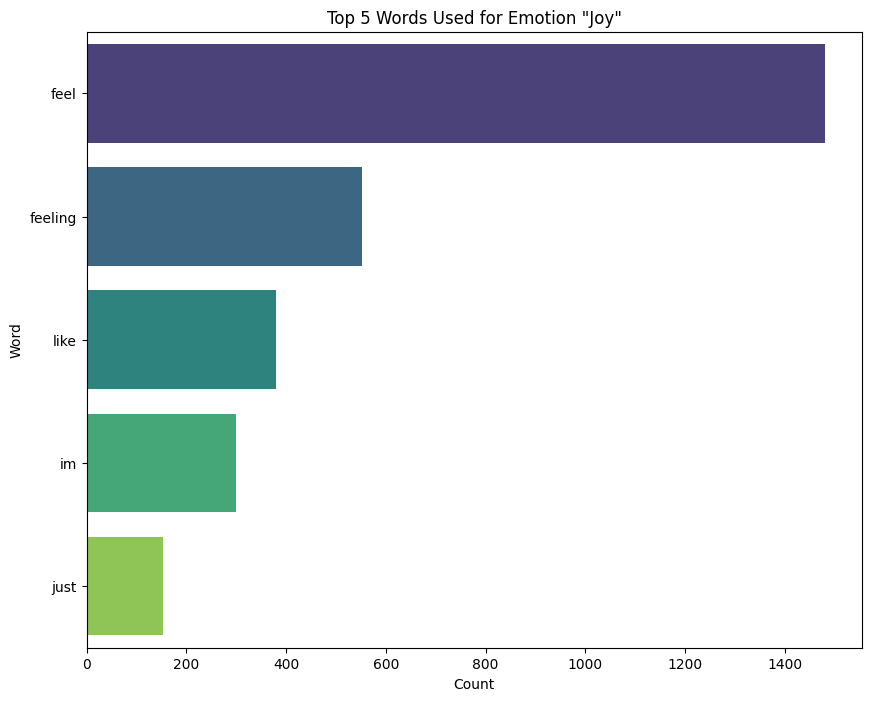

In [ ]:
# Initialize a CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Filter the DataFrame by emotion
emotion_data = df[df['Emotion'] == 'joy']

# Apply CountVectorizer to transform the text to a token count matrix
X = vectorizer.fit_transform(emotion_data['Comment'])

# Sum the counts of each term
sum_words = X.sum(axis=0)

# Map the indices to the terms
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort the words by frequency
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Get the top 5 words and their counts
top_words = words_freq[:5]

# Convert the top words to a DataFrame
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Count'])
top_words_df['Emotion'] = 'joy'

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Word', data=top_words_df, palette='viridis')
plt.title('Top 5 Words Used for Emotion "Joy"')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [ ]:
# Convert the 'Comment' column to lowercase
df['Comment'] = df['Comment'].str.lower()

# Display the first few rows to verify the transformation
print(df.head())

                                             Comment Emotion
0  i seriously hate one subject to death but now ...    fear
1                 im so full of life i feel appalled   anger
2  i sit here to write i start to dig out my feel...    fear
3  ive been really angry with r and i feel like a...     joy
4  i feel suspicious if there is no one outside l...    fear


In [ ]:
# we exclude the numbers, commas and dots by kept the other special characters can be beneficial for emotion analysis
df['Comment'] = df['Comment'].apply(lambda x: re.sub(r'[\d.,;]', '', x))
print(df.head())


                                             Comment Emotion
0  i seriously hate one subject to death but now ...    fear
1                 im so full of life i feel appalled   anger
2  i sit here to write i start to dig out my feel...    fear
3  ive been really angry with r and i feel like a...     joy
4  i feel suspicious if there is no one outside l...    fear


In [ ]:
stop_words = set(stopwords.words('english')) - set(['not'])
df['Comment'] = df['Comment'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))
print(df.head())


                                             Comment Emotion
0  seriously hate one subject death feel reluctan...    fear
1                         im full life feel appalled   anger
2  sit write start dig feelings think afraid acce...    fear
3  ive really angry r feel like idiot trusting fi...     joy
4  feel suspicious one outside like rapture happe...    fear


In [ ]:
def extract_emojis(str):
    return ''.join(c for c in str if c in emoji.EMOJI_DATA)

# Yorumlardan emoji'leri çıkar ve ayrı bir sütunda sakla
df['Emojis'] = df['Comment'].apply(extract_emojis)

print(df.head())

                                             Comment Emotion Emojis
0  seriously hate one subject death feel reluctan...    fear       
1                         im full life feel appalled   anger       
2  sit write start dig feelings think afraid acce...    fear       
3  ive really angry r feel like idiot trusting fi...     joy       
4  feel suspicious one outside like rapture happe...    fear       


<ipython-input-8-3538feb7d8f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_count.index, y=emotion_count.values, palette='viridis')


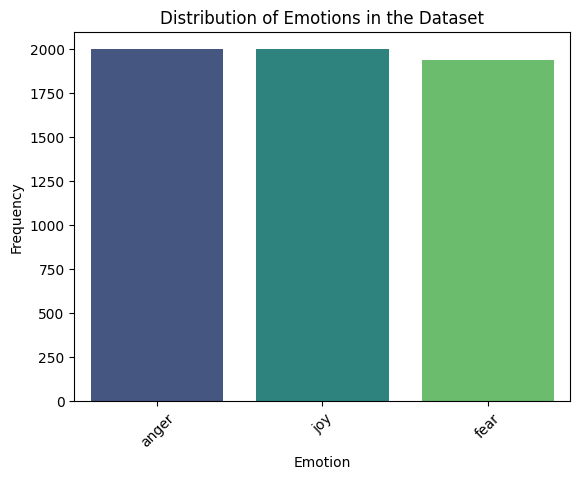

In [ ]:
# Visualize the distribution of data
emotion_count = df['Emotion'].value_counts()
sns.barplot(x=emotion_count.index, y=emotion_count.values, palette='viridis')
plt.title('Distribution of Emotions in the Dataset')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<ipython-input-9-e78939430220>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


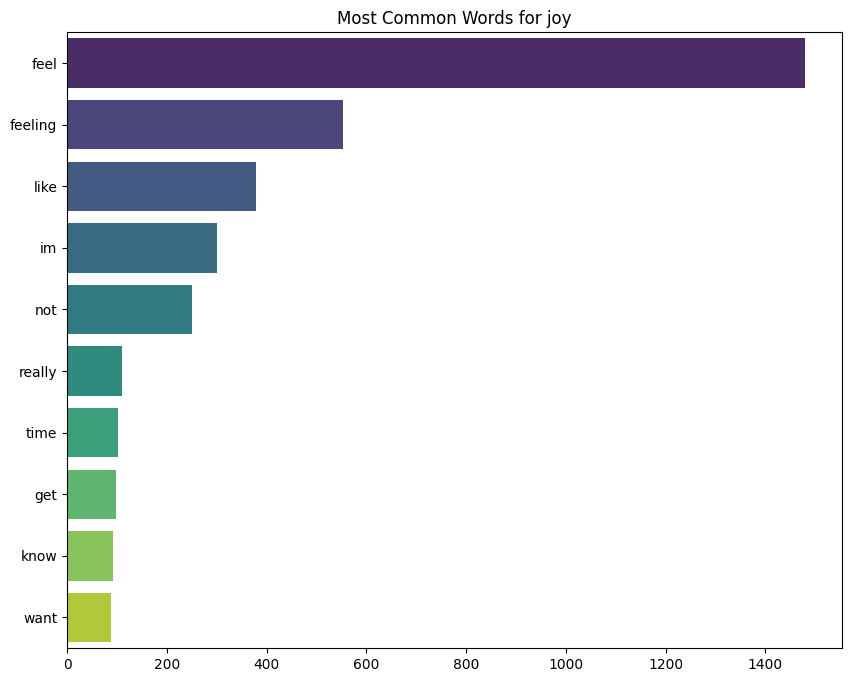

In [ ]:
# Word Frequency Analysis
def plot_most_common_words(df, emotion, n=10):
    # Filter the DataFrame for the specified emotion
    df_emotion = df[df['Emotion'] == emotion]

    # Tokenize words and calculate frequency
    words = []
    for comment in df_emotion['Comment']:
        words.extend(word_tokenize(comment))
    word_freq = Counter(words)

    # Get the most common words and their counts
    most_common_words = word_freq.most_common(n)

    # Plot
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Most Common Words for {emotion}')
    plt.show()

# Example usage for 'joy'
plot_most_common_words(df, 'joy')

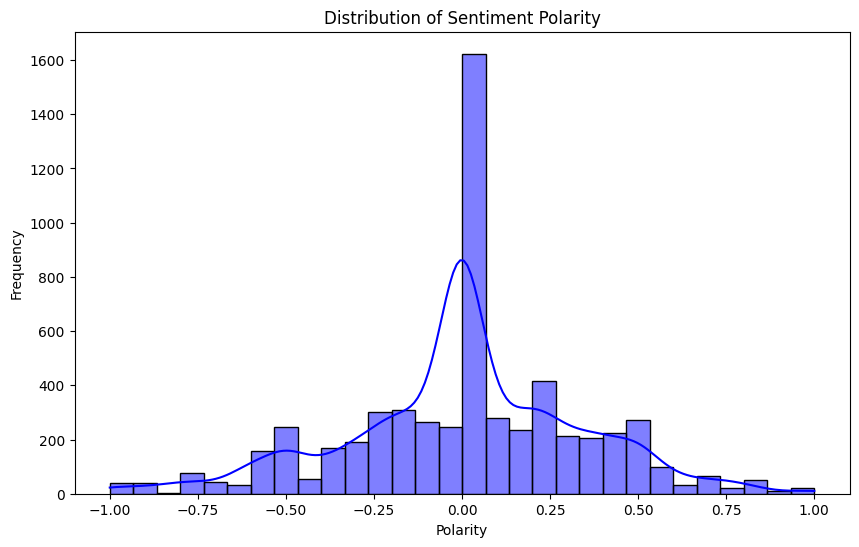

In [ ]:
from textblob import TextBlob

# Calculate sentiment polarity
df['Polarity'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize the sentiment polarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Polarity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

<ipython-input-11-c15ae898e1cd>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=ngram_list, palette='viridis')  # Düzeltilmiş değişken adını kullan


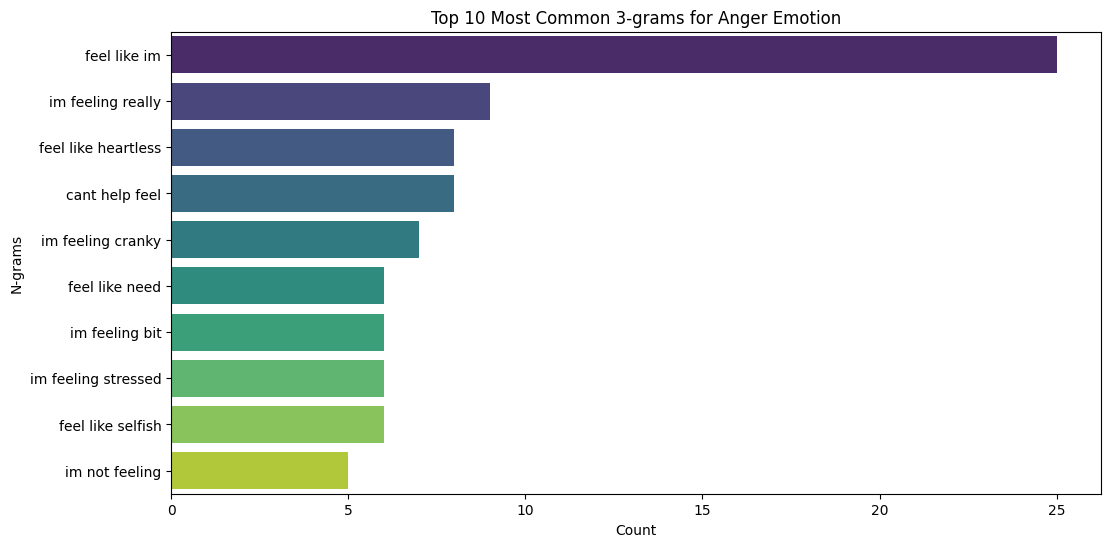

In [ ]:
from nltk.util import ngrams as nltk_ngrams  # Fonksiyon adını değiştirerek çakışmayı önle
from nltk import FreqDist

def plot_ngrams(df, emotion, n=2, top_n=10):
    # Filter the DataFrame for the specified emotion
    df_emotion = df[df['Emotion'] == emotion]

    # Prepare a list to store all ngrams
    all_ngrams = []

    # For each comment, calculate ngrams and append to the list
    for comment in df_emotion['Comment']:
        tokens = word_tokenize(comment)
        all_ngrams.extend(nltk_ngrams(tokens, n))  # Düzeltilmiş fonksiyon adını kullan

    # Calculate the frequency of each ngram
    ngram_freq = FreqDist(all_ngrams)

    # Get the most common ngrams
    most_common_ngrams = ngram_freq.most_common(top_n)

    # Plotting
    ngram_list, counts = zip(*most_common_ngrams)  # Değişken adını 'ngram_list' olarak değiştirdim
    ngram_list = [' '.join(ngram) for ngram in ngram_list]  # Convert ngram tuples to strings for plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=ngram_list, palette='viridis')  # Düzeltilmiş değişken adını kullan
    plt.title(f'Top {top_n} Most Common {n}-grams for {emotion.capitalize()} Emotion')
    plt.xlabel('Count')
    plt.ylabel('N-grams')
    plt.show()

# Usage example for 'joy' bigrams
plot_ngrams(df, 'anger', n=3, top_n=10)
# For trigrams, simply change n=3
# plot_ngrams(df, 'joy', n=3, top_n=10)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from scipy.sparse import hstack

# TF-IDF vektörleme işlemi için hazırlık yapın.
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,3))

# Veri setinizi TF-IDF vektörlerine dönüştürün.
X = vectorizer.fit_transform(df['Comment'])

# Belirli n-gramlar için ekstra ağırlıklar belirleyin.
# Bu örneklerde ifadelerinizi doğrudan n-gram olarak arayacağız.
# Burada, 'feeling little apprehensive', 'im feeling brave', 'feel like hearthless' gibi ifadeleri kullanıyoruz.
phrases = [
    "feeling little apprehensive", "feeling bit shaken", "feeling little unsure",
    "im feeling brave", "im feeling generous", "feel like important",
    "feel like hearthless", "im feeling cranky", "im feeling stressed", "feel like selfish"
]

# Bu özel ifadelerin varlığını kontrol edin ve bunları ayrı özellikler olarak ekleyin.
for phrase in phrases:
    # Her özel ifade için TF-IDF hesaplayın.
    phrase_vector = vectorizer.transform(df['Comment'].apply(lambda x: phrase if phrase in x else ''))

    # Phrase vektörlerini normalize edin.
    phrase_vector = normalize(phrase_vector, norm='l2', axis=0)

    # Vektörlerinize ekstra ağırlık verin. Örneğin 5 kat daha fazla.
    phrase_vector *= 5

    # TF-IDF vektör matrisine bu yeni vektörleri ekleyin.
    X = hstack([X, phrase_vector])

# Ağırlıklandırılmış özniteliklerle bir model eğitimi yapmak için artık X kullanabilirsiniz.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with n-grams ranging from 1 to 3
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,3))

# Fit the vectorizer to the 'Comment' column and transform the text to TF-IDF
X_tfidf = vectorizer.fit_transform(df['Comment'])

# Retrieve the feature names (which includes the n-grams)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to view the Bag of Words model
df_bow = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# Display the first few rows of the DataFrame
print(df_bow.head())


   able  absolutely  acceptable  accepted  across  act  actually  \
0   0.0         0.0         0.0       0.0     0.0  0.0       0.0   
1   0.0         0.0         0.0       0.0     0.0  0.0       0.0   
2   0.0         0.0         0.0       0.0     0.0  0.0       0.0   
3   0.0         0.0         0.0       0.0     0.0  0.0       0.0   
4   0.0         0.0         0.0       0.0     0.0  0.0       0.0   

   actually feel  admit  adventurous  ...  wrong  wronged  wrote  year  years  \
0            0.0    0.0          0.0  ...    0.0      0.0    0.0   0.0    0.0   
1            0.0    0.0          0.0  ...    0.0      0.0    0.0   0.0    0.0   
2            0.0    0.0          0.0  ...    0.0      0.0    0.0   0.0    0.0   
3            0.0    0.0          0.0  ...    0.0      0.0    0.0   0.0    0.0   
4            0.0    0.0          0.0  ...    0.0      0.0    0.0   0.0    0.0   

   yes  yesterday  yet  young  youre  
0  0.0        0.0  0.0    0.0    0.0  
1  0.0        0.0  0.0    

In [ ]:
import numpy as np

# 'able' kelimesinin indeksini alın
index_of_able = np.where(feature_names == 'able')[0][0]

# 'able' kelimesinin en yüksek TF-IDF değerine sahip olduğu satırın indeksini bulun
max_tfidf_row_index_for_able = df_bow.iloc[:, index_of_able].argmax()

# 'able' kelimesinin en yüksek TF-IDF değerine sahip olduğu satırı bulun
max_tfidf_row_for_able = df_bow.iloc[max_tfidf_row_index_for_able, :]

# Sonucu görüntüleyin
print("En yüksek TF-IDF değerine sahip olan satır:")
print(max_tfidf_row_for_able)


En yüksek TF-IDF değerine sahip olan satır:
able          0.591902
absolutely    0.000000
acceptable    0.000000
accepted      0.000000
across        0.000000
                ...   
yes           0.000000
yesterday     0.000000
yet           0.000000
young         0.000000
youre         0.000000
Name: 5361, Length: 1000, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['Emotion'], test_size=0.2, random_state=42)

# Basit bir model seçimi: Multinomial Naive Bayes
model = MultinomialNB()

# Modeli eğitme
model.fit(X_train, y_train)

# Modeli test seti üzerinde değerlendirme
y_pred = model.predict(X_test)

# Sınıflandırma raporu
print(classification_report(y_test, y_pred))

# Karışıklık matrisi
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.91      0.94      0.92       392
        fear       0.94      0.89      0.92       416
         joy       0.91      0.93      0.92       380

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188

[[368  10  14]
 [ 23 372  21]
 [ 13  12 355]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parametre grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]  # Örnek bir parametre grid
}

# Grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# En iyi parametreler
print("En iyi parametreler:", grid_search.best_params_)

# En iyi model
best_model = grid_search.best_estimator_


En iyi parametreler: {'alpha': 0.5}


In [ ]:
# En iyi parametrelerle eğitilmiş modelin performansını değerlendirme
y_pred_best = best_model.predict(X_test)

# Sınıflandırma raporu
print("En iyi modelin Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_best))

# Karışıklık matrisi
print("En iyi modelin Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred_best))


En iyi modelin Sınıflandırma Raporu:
               precision    recall  f1-score   support

       anger       0.91      0.94      0.92       392
        fear       0.94      0.90      0.92       416
         joy       0.91      0.93      0.92       380

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188

En iyi modelin Karışıklık Matrisi:
 [[367  11  14]
 [ 24 373  19]
 [ 13  12 355]]


In [ ]:
# Yeni veri setini yükleyin
emotions2_path = "/content/drive/MyDrive/Colab_Notebooks/emotion2.csv"
emotions2_df = pd.read_csv(emotions2_path)

# 'sadness' ve 'surprise' etiketli verileri filtreleyin ve etiketleri metin olarak güncelleyin
emotions2_df['Emotion'] = emotions2_df['label'].map({0: 'sadness', 5: 'surprise'})

# 'label' sütununu kaldırın (artık gerekli değil)
emotions2_df = emotions2_df.drop('label', axis=1)

# 'sadness' ve 'surprise' etiketlerini içeren verileri seçin
emotions2_filtered_df = emotions2_df[emotions2_df['Emotion'].isin(['sadness', 'surprise'])]

# Ana veri setindeki sütun isimlerini kontrol edin ve eğer farklıysa uyumlu hale getirin
print("Original dataset columns:", df.columns)
print("New dataset columns:", emotions2_filtered_df.columns)

# Eğer 'text' sütunu ana veri setinde 'Comment' olarak adlandırılmışsa, bunu da düzeltmek gerekir
emotions2_filtered_df = emotions2_filtered_df.rename(columns={'text': 'Comment'})

# Orijinal DataFrame ile birleştirin
combined_df = pd.concat([df, emotions2_filtered_df])

# Birleştirilmiş veri setini kontrol edin
print(combined_df['Emotion'].value_counts())

# Yeni veri setini bir CSV dosyası olarak kaydedin
combined_df.to_csv("/content/drive/MyDrive/Colab_Notebooks/combined_emotions_dataset.csv", index=False)


Original dataset columns: Index(['Comment', 'Emotion', 'Emojis', 'Polarity'], dtype='object')
New dataset columns: Index(['Unnamed: 0', 'text', 'Emotion'], dtype='object')
Emotion
sadness     121187
surprise     14972
anger         2000
joy           2000
fear          1937
Name: count, dtype: int64


In [ ]:
emotion_counts = combined_df['Emotion'].value_counts()

# Sonuçları yazdırın
print(emotion_counts)

Emotion
sadness     121187
surprise     14972
anger         2000
joy           2000
fear          1937
Name: count, dtype: int64


In [ ]:
# Sadness etiketli girdilerin sayısını kontrol etmek için
sadness_count = combined_df[combined_df['Emotion'] == 'sadness'].shape[0]
print(f"Sadness count: {sadness_count}")


Sadness count: 121187


In [ ]:
from sklearn.utils import resample

# Oversampling 'joy', 'anger', ve 'fear'
target_sample_size = 15000  # Hedef örnek sayısı

joy_augmented = resample(combined_df[combined_df['Emotion'] == 'joy'],
                         replace=True,  # Örnekleri tekrar seç
                         n_samples=target_sample_size,
                         random_state=123)

anger_augmented = resample(combined_df[combined_df['Emotion'] == 'anger'],
                           replace=True,
                           n_samples=target_sample_size,
                           random_state=123)

fear_augmented = resample(combined_df[combined_df['Emotion'] == 'fear'],
                          replace=True,
                          n_samples=target_sample_size,
                          random_state=123)

# Undersampling 'sadness'
sadness_reduced = resample(combined_df[combined_df['Emotion'] == 'sadness'],
                           replace=False,  # Örnekleri tekrar seçme
                           n_samples=15000,  # Hedef örnek sayısı
                           random_state=123)

# Tüm verileri birleştirme
balanced_df = pd.concat([joy_augmented, anger_augmented, fear_augmented, sadness_reduced,
                         combined_df[combined_df['Emotion'] == 'surprise']])

# Yeni veri setinin boyutunu kontrol etme
print(balanced_df['Emotion'].value_counts())


Emotion
joy         15000
anger       15000
fear        15000
sadness     15000
surprise    14972
Name: count, dtype: int64


In [ ]:
# Metinleri küçük harfe çevirme
balanced_df['Comment'] = balanced_df['Comment'].str.lower()

# Noktalama işaretleri ve rakamları kaldırma
balanced_df['Comment'] = balanced_df['Comment'].apply(lambda x: re.sub(r'[\d.,;]', '', x))

# Stopwords'leri çıkarma
stop_words = set(stopwords.words('english')) - set(['not'])
balanced_df['Comment'] = balanced_df['Comment'].apply(
    lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words])
)


<ipython-input-23-d4ca93e772dc>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=ngram_list, palette='viridis')


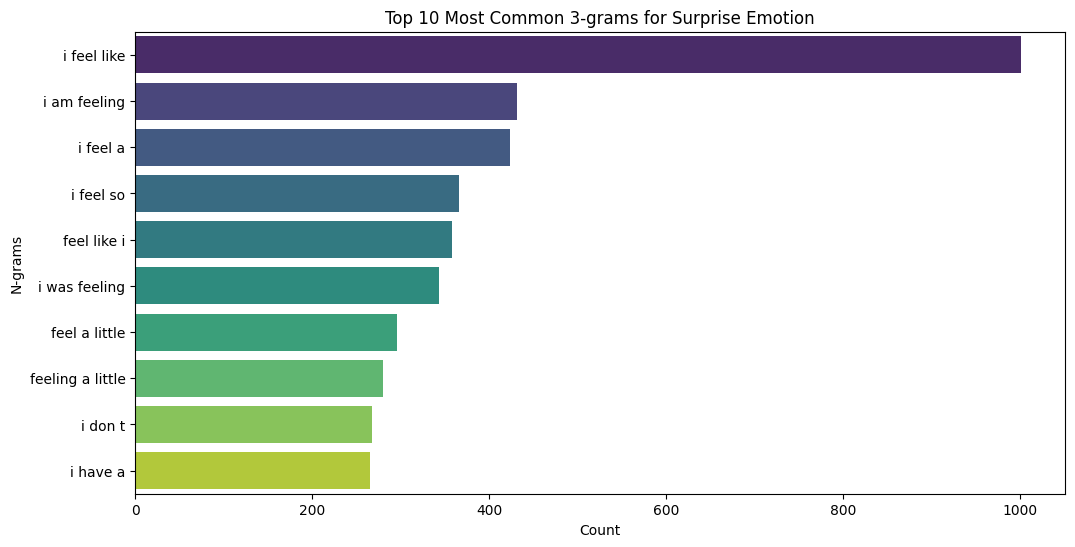

In [ ]:
from nltk.util import ngrams as nltk_ngrams
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

def plot_ngrams(df, emotion, n=2, top_n=10):
    # Filter the DataFrame for the specified emotion
    balanced_df = df[df['Emotion'] == emotion]

    # Prepare a list to store all ngrams
    all_ngrams = []

    # For each comment, calculate ngrams and append to the list
    for comment in balanced_df['Comment']:
        tokens = word_tokenize(comment)
        all_ngrams.extend(nltk_ngrams(tokens, n))

    # Calculate the frequency of each ngram
    ngram_freq = FreqDist(all_ngrams)

    # Get the most common ngrams
    most_common_ngrams = ngram_freq.most_common(top_n)

    # Plotting
    ngram_list, counts = zip(*most_common_ngrams)  # Convert ngram tuples to strings for plotting
    ngram_list = [' '.join(ngram) for ngram in ngram_list]
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=ngram_list, palette='viridis')
    plt.title(f'Top {top_n} Most Common {n}-grams for {emotion.capitalize()} Emotion')
    plt.xlabel('Count')
    plt.ylabel('N-grams')
    plt.show()


# For trigrams, simply change n=3
plot_ngrams(combined_df, 'surprise', n=3, top_n=10)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from scipy.sparse import hstack

# TF-IDF vektörleme işlemi için hazırlık yapın.
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,3))

# Veri setinizi TF-IDF vektörlerine dönüştürün.
X = vectorizer.fit_transform(balanced_df['Comment'])

# Önceki ifadeler ve yeni ifadeleri birleştirin
phrases = [
    "feeling little apprehensive", "feeling bit shaken", "feeling little unsure",
    "im feeling brave", "im feeling generous", "feel like important",
    "feel like hearthless", "im feeling cranky", "im feeling stressed", "feel like selfish",
    # Sadness için yeni ifadeler
    "feel like missed", "feel like punished",
    # Surprise için yeni ifadeler
    "remember feeling shocked", "feeling little dazed"
]

# Bu özel ifadelerin varlığını kontrol edin ve bunları ayrı özellikler olarak ekleyin.
for phrase in phrases:
    # Her özel ifade için TF-IDF hesaplayın.
    phrase_vector = vectorizer.transform(balanced_df['Comment'].apply(lambda x: phrase if phrase in x else ''))

    # Phrase vektörlerini normalize edin.
    phrase_vector = normalize(phrase_vector, norm='l2', axis=0)

    # Vektörlerinize ekstra ağırlık verin. Örneğin 5 kat daha fazla.
    phrase_vector *= 5

    # TF-IDF vektör matrisine bu yeni vektörleri ekleyin.
    X = hstack([X, phrase_vector])

# Ağırlıklandırılmış özniteliklerle bir model eğitimi yapmak için artık X kullanabilirsiniz.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# TF-IDF vektörleme işlemi
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,3))
X = vectorizer.fit_transform(balanced_df['Comment'])

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, balanced_df['Emotion'], test_size=0.2, random_state=42)

# Basit bir model seçimi: Multinomial Naive Bayes
model = MultinomialNB()

# Modeli eğitme
model.fit(X_train, y_train)

# Modeli test seti üzerinde değerlendirme
y_pred = model.predict(X_test)

# Sınıflandırma raporu
print(classification_report(y_test, y_pred))

# Karışıklık matrisi
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.89      0.90      0.89      3017
        fear       0.87      0.82      0.85      3024
         joy       0.86      0.87      0.87      2999
     sadness       0.87      0.83      0.85      2947
    surprise       0.87      0.93      0.90      3008

    accuracy                           0.87     14995
   macro avg       0.87      0.87      0.87     14995
weighted avg       0.87      0.87      0.87     14995

[[2719   71   91  123   13]
 [ 109 2486   77   93  259]
 [  83   85 2614  123   94]
 [ 140  122  179 2454   52]
 [  17   83   78   23 2807]]
